# Data visualization


데이터 품질 및 분포특성을 시각적으로 확인하기 위해 사용

데이터 이해 및 분석 결과를 설득력있게 표현하기 위해 사용

모집단 : 분석에 대상이 되는 집단 전체

표본집단 : 모집단에서 추출된 모집단의 부분집합

모집단의 특성을 추정하기 위해서 통계적인 기법을 사용



In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [9]:
setosa_petal_lenght = iris[iris['species']=='setosa']['petal_length']

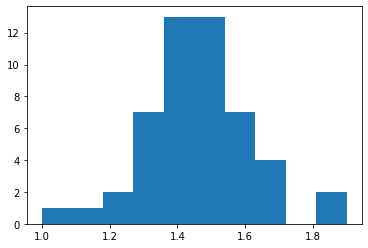

In [10]:
import matplotlib.pyplot as plt
plt.hist(setosa_petal_lenght, bins=10)
plt.show()

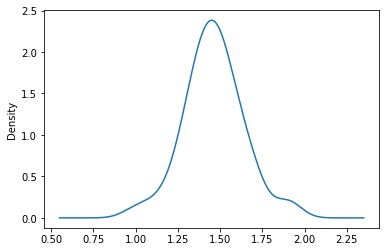

In [12]:
iris[iris['species']=='setosa']['petal_length'].plot.density()
plt.show()

커널 밀도 추정은 커널 함수를 이용한 밀도 추정 방법 중 하나

밀도 추정이란 추출된 데이터들을 이용해서 밀도함수를 구하는 것



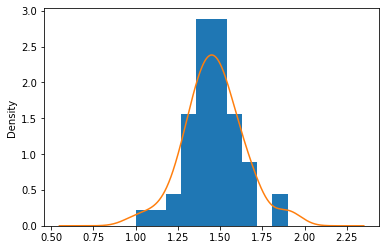

In [13]:
ax = iris[iris['species']=='setosa']['petal_length'].plot.hist(density=True)
iris[iris['species']=='setosa']['petal_length'].plot.density(ax=ax)
plt.show()

**왜도(Skewness)**

데이터의 분포에 따라서 오른쪽으로 치우쳤는지 왼쪽으로 치우쳤는지

Negative Skewness : 데이터의 중심이 오른쪽으로 치우쳤을때

Positive Skewness : 데이터의 중심이 왼쪽으로 치우쳤을때

**첨도(Kurtosis)**

데이터가 얼마나 평균에 모여있는지

Leptokurtic(고첨) : 정규분포보다 많이 몰려 있어서 뾰족

Mesokurtic(중첨) : 정규분포와 유사

Pltykurtic(저첨) : 정규분포 보다 완만

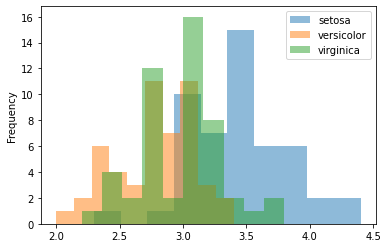

In [17]:
fig, ax = plt.subplots(1,1)

for species in iris['species'].unique():
  width_series = iris[iris['species']==species]['sepal_width']
  width_series.plot.hist(alpha = 0.5, ax=ax, label=species)
plt.legend()
plt.show()

In [14]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

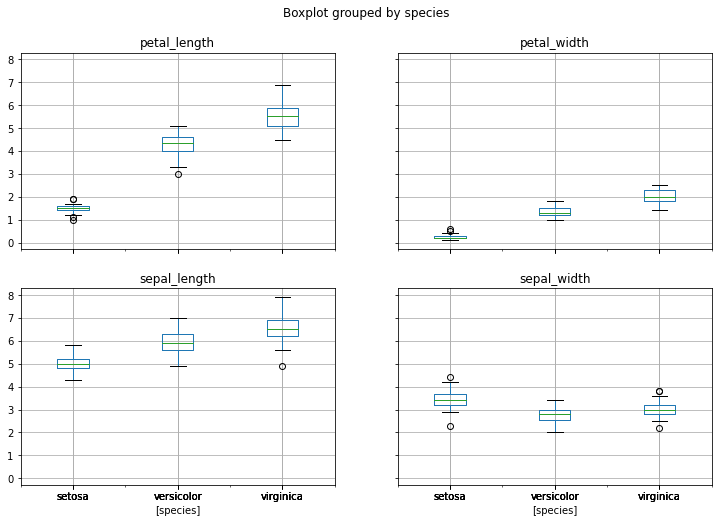

In [18]:
# Box Plot
iris.boxplot(by='species', layout=(2,2), figsize=(12,8))
plt.show()

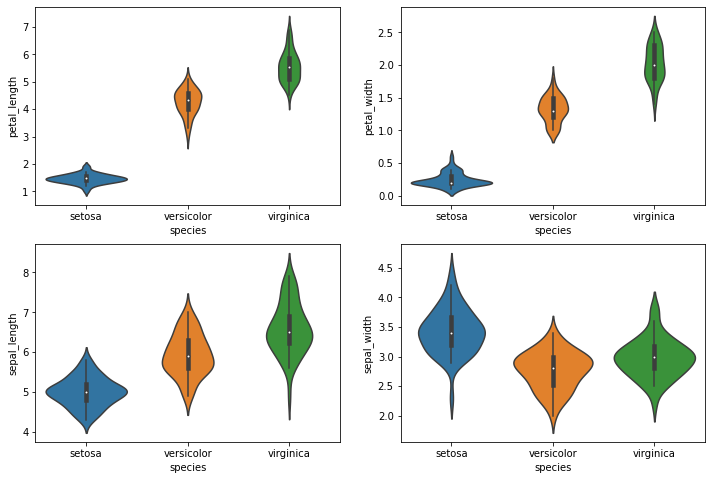

In [19]:
# Violin plot
fig, ax = plt.subplots(2,2, figsize=(12,8))

for i, col in enumerate(['petal_length','petal_width','sepal_length','sepal_width']):
  sns.violinplot(data=iris, x='species', y=col, ax=ax[i//2][i%2])

plt.show()              

**데이터의 중심**

**최빈값(mode)**

* 빈도가 가장 높은값
* 범주형 데이터의 대표값
* 2개 이상 존재


**중앙값**
* 데이터를 내림차순 해서 가장 중간에 있는 데이터
* 짝수개 일 경우는 중앙에 있는 데이터 두개를 더하고 나눈 값이 중앙값


**산술평균**
* 일반적으로 사용하는 평균
* 극단값 이상치에 영향을 많이 받는 통계량
* 데이터의 개수로 나눔

**가중평균**
* 일반적인 산술 평균 각각의 데이터마다 중요도에 따라서 가중치
* 가중치를 다 더한 값으로 나눠줌

**기하평균**
* 성장률이나 증가율 이런 비율에 대한 데이터를 평균 낼 때 사용
* 음수나 0의 데이터가 있는 경우에는 적용을 못합니다.

**편차**
* 데이터 값과 평균을 빼준 값

**분산**
* 편차의 제곱의 합을 데이터 수로 나눈 값
* 편차를 다 더하면 0나오기 때문에 제곱을 진행
* 편차가 큰 데이터 값에 대해 영향정도를 키우기 위해서

**표준편차**
* 분산의 제곱근을 한 값

## 단어
**모집단**
* 조사 대상이 되는 모든집단

**표폰(Sampling)집단**
* 모집단의 부분집합

**모수**
* 모집단의 어떤 값

**통계량**
* 표본 집단의 정보

In [20]:
import numpy as np
data = np.arange(10, 20, 0.1)

In [21]:
sum_ = 0
for i in data:
  sum_ += i
sum_/len(data)
# data.mean()

14.949999999999978

In [22]:
data.mean()

14.949999999999982

In [23]:
from scipy.stats import trim_mean
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10])
mean_ = np.mean(data)
trim_mean_ = trim_mean(data, 0.1)
median = np.median(data)
print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 3.7
절삭평균 = 3.25
중앙값 = 3.0



In [24]:
from scipy.stats import trim_mean
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 9999999999])
mean_ = np.mean(data)
trim_mean_ = trim_mean(data, 0.1)
median = np.median(data)
print(f'''
mean = {mean_}
절삭평균 = {trim_mean_}
중앙값 = {median}
''')


mean = 909090912.3636364
절삭평균 = 4.0
중앙값 = 3.0



In [25]:
data = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5, 10, 9999999999])
data_length = len(data)

if data_length %2 == 0:
  idx = data_length//2
  median = (data[idx] + data[idx+1])/2

else:
  idx = data_length//2
  median = data[idx]
  
print('중앙값 : ', median)

중앙값 :  3


**굵은 텍스트**### 가중평균

In [26]:
data = np.array([10, 20, 30, 40, 50 ,60 ,70, 80, 90, 100])
weights = np.array([0.1, 0.05, 0.3, 0.05, 0.15, 0.025, 0.025, 0.05, 0.125 ,0.175])

In [27]:
sum_ = 0
for idx in range(len(data)):
  sum_ += weights[idx]*data[idx]
print(sum_/sum(weights))

53.80952380952381


### 최빈값

In [28]:
import numpy as np
data = np.array([1,1,2,2,2,3,4,5,6,7,7,7,7,7,8,8,9,10])
count_dict = dict()
for d in data:
  if d not in count_dict:
    count_dict[d] = 1
  else:
    count_dict[d] += 1

def func(x):
  return x[1]

sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[0][0]

7

## 편차 표준편차 분산

In [29]:
norm = np.random.normal(10.0, 2.0, 100)

In [30]:
# 평균
norm_mean = norm.mean()

In [31]:
# 편차
norm_dev = [i-norm_mean for i in norm]

In [32]:
# 분산
norm_var = sum([i**2 for i in norm_dev])/(len(norm) - 1)

In [33]:
# 표준편차
import math
math.sqrt(norm_var)
# np.std(norm_var) # 넘파이 내 표준편차 구하는 메서드

2.142709352197234

### 기하평균

In [34]:
score_rate = [1.1, 2.1, 0.91, 0.14, 0.51]
mul_ = 1
for rate in score_rate:
  mul_ *= rate

geometric_mean = mul_**(1/len(score_rate))

In [35]:
geometric_mean

0.6843374651564551

## 실습

In [36]:
import seaborn as sns
dataset = sns.get_dataset_names()

In [37]:
dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [38]:
planets = sns.load_dataset('planets')

In [39]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [40]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [41]:
planets[planets['orbital_period'].isnull()].head()

,method,number,orbital_period,mass,distance,year
29,Imaging,1,NaN,NaN,45.52,2005
30,Imaging,1,NaN,NaN,165.00,2007
31,Imaging,1,NaN,NaN,140.00,2004
33,Imaging,1,NaN,NaN,NaN,2008
34,Imaging,1,NaN,NaN,145.00,2013


In [42]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

## 귀여운 펭귄데이터 이용

In [43]:
penguins = sns.load_dataset('penguins')

In [44]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [45]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [46]:
penguins[penguins['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [65]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [66]:
bill_length_mm = penguins[penguins['bill_length_mm'].isnull()==False]
bill_depth_mm = penguins[penguins['bill_depth_mm'].isnull()==False]
flipper_length_mm = penguins[penguins['flipper_length_mm'].isnull()==False]
body_mass_g = penguins[penguins['body_mass_g'].isnull()==False]
notnull_penguins = penguins[penguins['sex'].isnull()==False]

In [67]:
bill_length_mm

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.0,0.0,0.0,0.0,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [61]:
notnull_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff48b981e50>


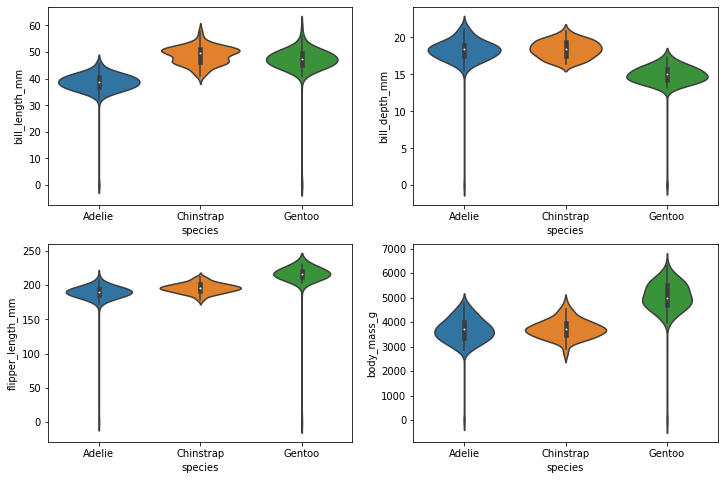

In [68]:
# Violin plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,8))
print(ax)

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
  sns.violinplot(data=bill_length_mm, x='species', y=col, ax=ax[i//2][i%2])

plt.show()              

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff48990eb10>


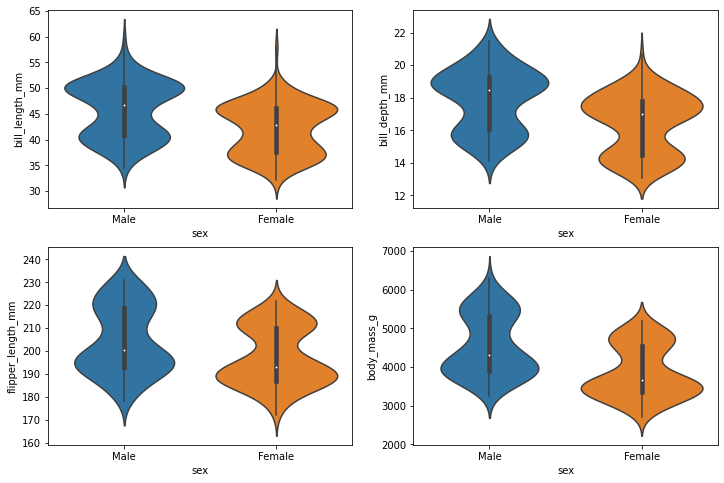

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(12,8))
print(ax)

for i, col in enumerate(['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']):
  sns.violinplot(data=notnull_penguins, x='sex', y=col, ax=ax[i//2][i%2])

plt.show()   

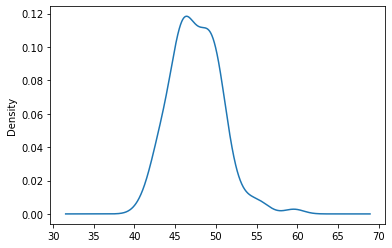

In [73]:
notnull_penguins[notnull_penguins['species']=='Gentoo']['bill_length_mm'].plot.density()
plt.show()